# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.156147e+01     7.637319e+00
 * time: 0.0020890235900878906
     1     3.038467e+01     5.865412e+00
 * time: 0.008139848709106445
     2     2.391071e+01     6.893290e+00
 * time: 0.013480901718139648
     3     2.298476e+01     1.140973e+01
 * time: 0.022066831588745117
     4     1.217325e+01     2.199012e+00
 * time: 0.03254103660583496
     5     9.749562e+00     1.448688e+00
 * time: 0.0418698787689209
     6     9.121973e+00     1.720614e+00
 * time: 0.0478968620300293
     7     8.742098e+00     6.938994e-01
 * time: 0.052803993225097656
     8     8.421756e+00     6.043121e-01
 * time: 0.05787396430969238
     9     8.278488e+00     5.440480e-01
 * time: 0.06241297721862793
    10     8.153156e+00     3.903287e-01
 * time: 0.06662988662719727
    11     8.055230e+00     3.729505e-01
 * time: 0.07057595252990723
    12     7.972762e+00     5.746072e-01
 * time: 0.07462596893310547
    13     7.958202e+00     5.571525e-01
 * t

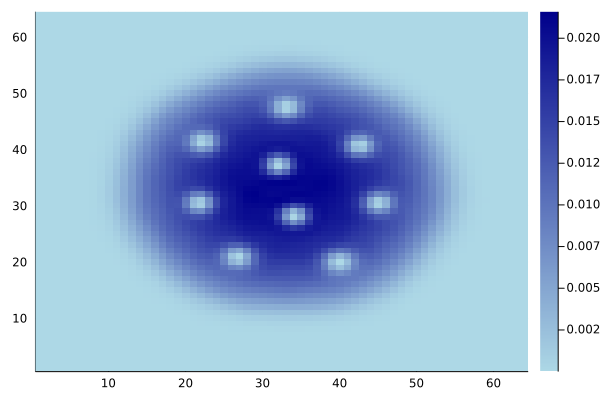

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)